In [1]:
!pip install -q numpy
!pip install -q pandas
!pip install -q gensim
!pip install -q pynndescent>=0.4
!pip install -q umap-learn
!pip install -q hdbscan
!pip install -q wordcloud
!pip install -q tensorflow
!pip install -q tensorflow_hub
!pip install -q tensorflow_text
!pip install -q torch
!pip install -q sentence_transformers
!pip install -q hnswlib
!pip install -q joblib<1.0.0

ERROR: numba 0.52.0 has requirement llvmlite<0.36,>=0.35.0, but you'll have llvmlite 0.31.0 which is incompatible.
     |████████████████████████████████| 25.3MB 130kB/s 
     |████████████████████████████████| 4.7MB 18.0MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 3.4MB 16.0MB/s 
     |████████████████████████████████| 71kB 7.6MB/s 
     |████████████████████████████████| 1.5MB 23.8MB/s 
     |████████████████████████████████| 1.2MB 50.3MB/s 
     |████████████████████████████████| 2.9MB 49.3MB/s 
     |████████████████████████████████| 890kB 54.3MB/s 
     |████████████████████████████████| 194kB 9.2MB/s 
  ERROR: Failed building wheel for hnswlib
    Running setup.py install for hnswlib ... done
/bin/bash: 1.0.0: No such file or directory


In [2]:
!pip install -q top2vec[sentence_transformers]

     |████████████████████████████████| 307kB 21.5MB/s 


# Imports

In [1]:
import numpy as np
import pandas as pd
from copy import deepcopy
from top2vec import Top2Vec

# Load data

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head(3)

,Reviews
0,Saw the car on the road today and i found it t...
1,Built quality is very solid and a quick peppy ...
2,Even it's base model has all features and safe...


In [4]:
docs = list(df.loc[:, "Reviews"].values)

In [5]:
docs[:5]

['Saw the car on the road today and i found it to have good enough road presence.',
 'Built quality is very solid and a quick peppy engine.',
 "Even it's base model has all features and safety like traction control abs ebd etc",
 'The diesel engine is providing extreme performance to the car like a beast.',
 "It's very comfortable and doesn't make us tired at all."]

# Top2Vec

In [6]:
model = Top2Vec(docs, embedding_model='universal-sentence-encoder')

2021-01-10 19:00:44,769 - top2vec - INFO - Pre-processing documents for training
2021-01-10 19:00:44,816 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:absl:resolver HttpCompressedFileResolver does not support the provided handle.
INFO:absl:resolver GcsCompressedFileResolver does not support the provided handle.
2021-01-10 19:01:50,883 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2021-01-10 19:01:52,882 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2021-01-10 19:02:02,108 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2021-01-10 19:02:02,136 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [7]:
model.get_num_topics()

16

In [8]:
topic_words, word_scores, topic_nums = model.get_topics(2)

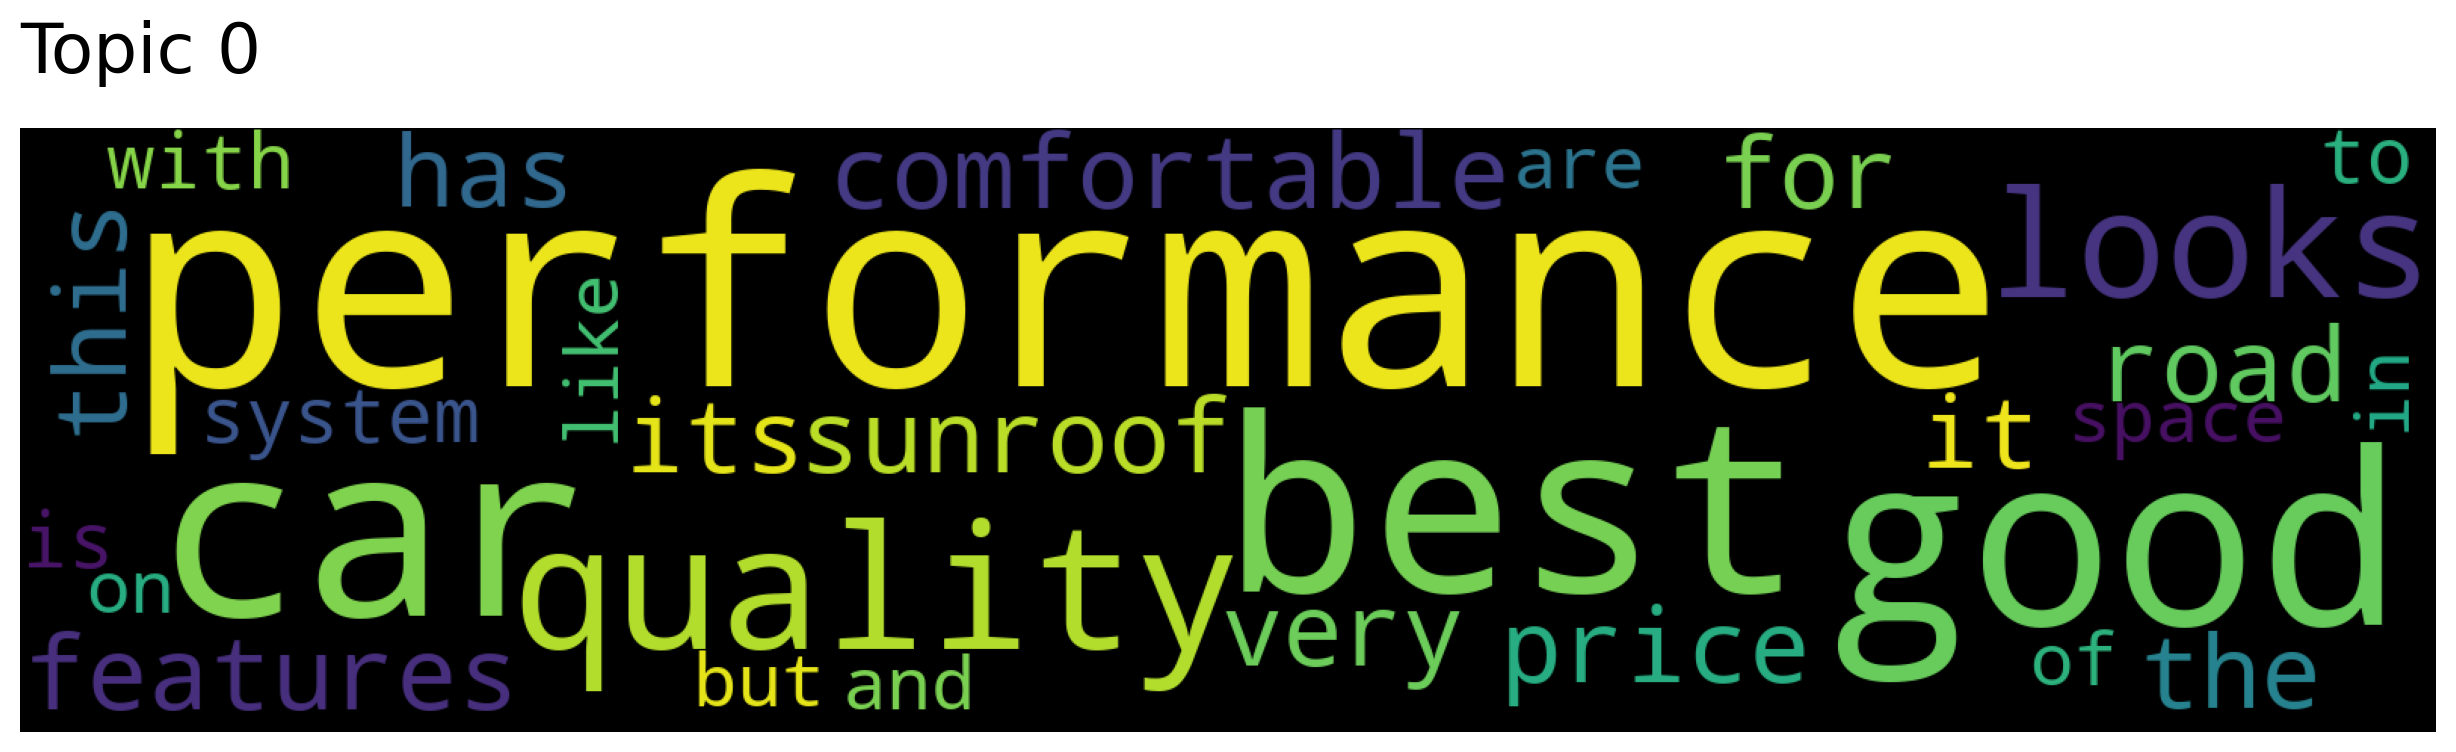

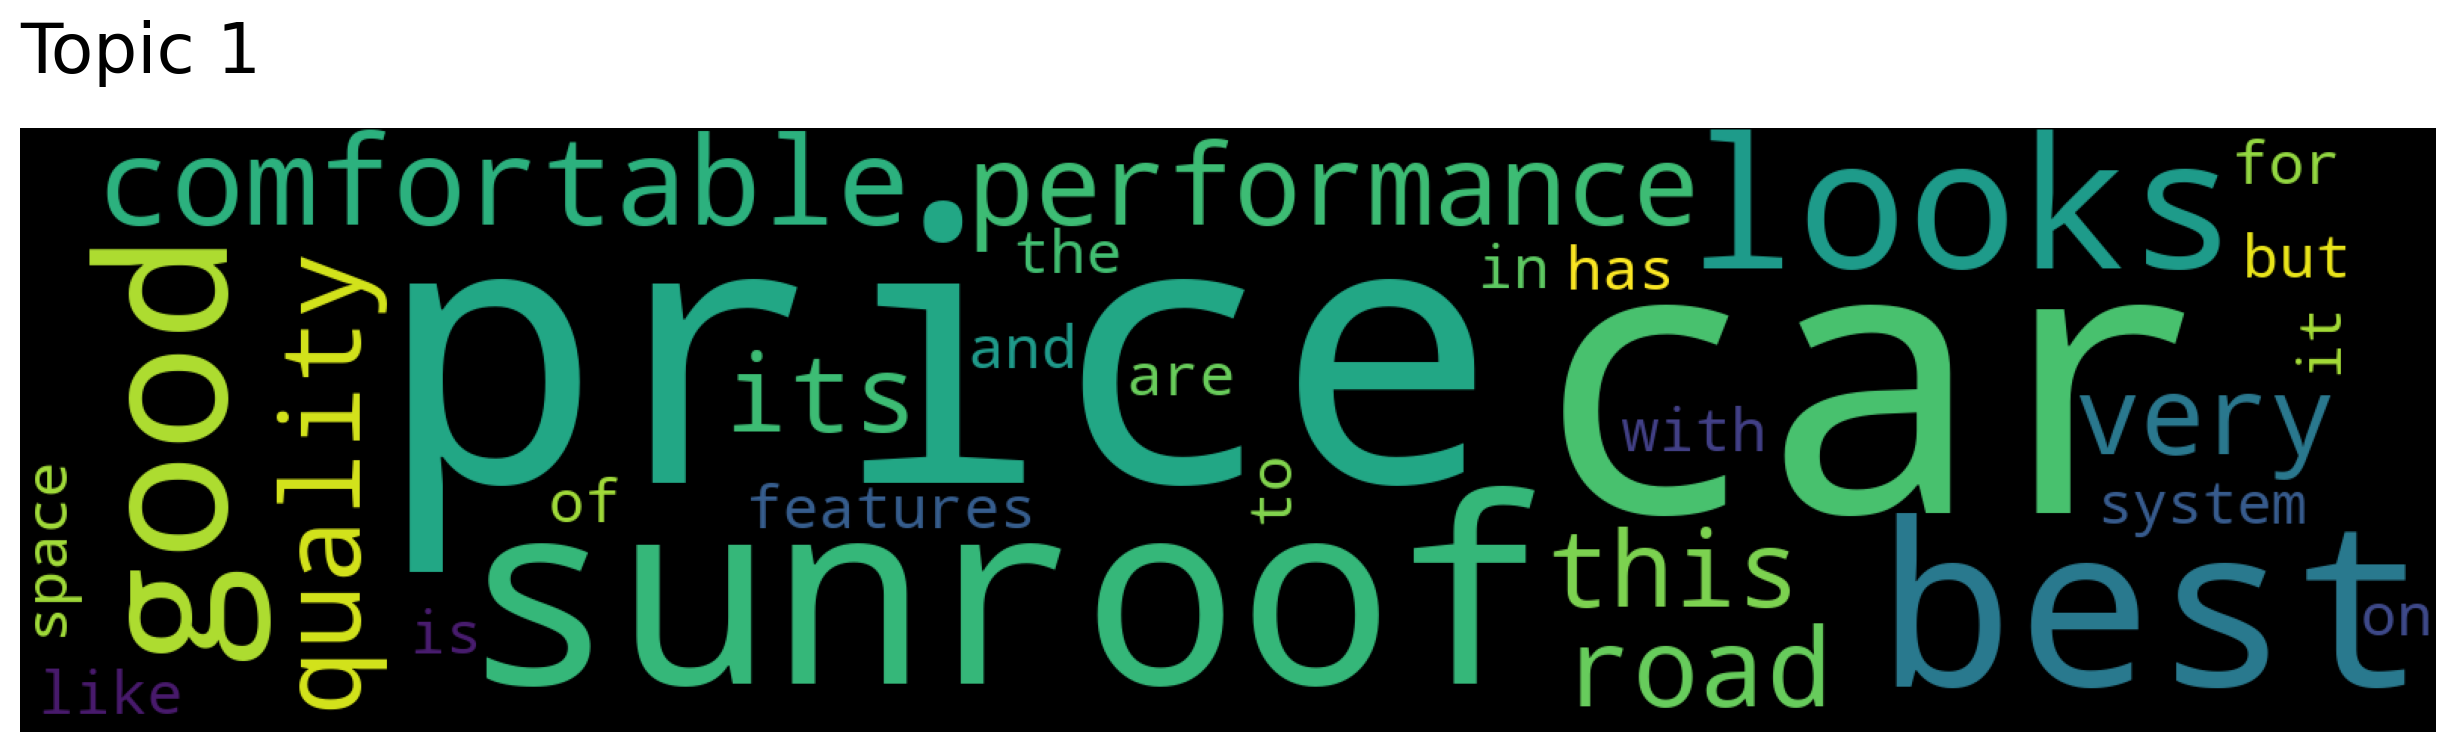

In [9]:
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)